## To Create Notebook 
<p> To create the new notebook command <b> CTRL+SHIFT+P </b>  
</p>

## To create paragrah and bold 
<p> This is paragraph (To edit Click the text and then click the pen icon on the right side of this box) </p>
<b> This is bold </b>

## STEP 1
<p> <b> 1: Import necessary libraries </b></p>

In [89]:
import pandas as pd  # for data reading
import matplotlib.pyplot as plt # for visulization
from mlxtend.frequent_patterns import apriori, association_rules #Association Rule -> to install library run in the terminal "pip install mlxtend"

## STEP 2
<p> <b> Load Dataset </b></p>

In [90]:
df2 = pd.read_csv('bank-additional-full.csv', sep=';')
df2.shape
# one_df = df2[df2['job'] == 'unknown']
# one_df.shape
# # one_df.head()

(41188, 21)

## STEP 3
<p><b>
Read Dataset
</b></p>

In [91]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Step 4
<p><b>
Data Preprocessing : Select relevant columns for association rule mining
</b></p>

In [92]:
# Remove rows where the "job" column has the value "unknown"
df = df2[df2['job'] != 'unknown'].copy()
# df.shape
# df.head()
df['age_bin'] = pd.cut(df['age'], bins=[0,30,50,100], labels=["young", "middle-aged", "senior"])
df['duration_bin'] = pd.cut(df['duration'], bins=[0, 102, 319, df['duration'].max()], labels=["low", "medium", "high"])

In [93]:
categorical_columns = ['age_bin', 'duration_bin','job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
df_encoded = pd.get_dummies(df[categorical_columns])
print(df_encoded.shape)

(40858, 55)


## Step 5
<p><b>
Read Encoded Dataset
</b></p>

In [94]:
df_encoded.head()

,age_bin_young,age_bin_middle-aged,age_bin_senior,duration_bin_low,duration_bin_medium,duration_bin_high,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,False,False,True,False,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
1,False,False,True,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,True,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,False,True,False,False,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,False,False,True,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


## Step 6
<p><b>
Apply Apriori Algorithm to find frequent itemsets
</b></p>

In [95]:
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

## Step 7
<p><b>
Display the frequent itemsets
</b></p>

In [96]:
# frequent_itemsets.head(30) # remove '#' if u want to show 30 rows
frequent_itemsets.head()

,support,itemsets
0,0.179891,(age_bin_young)
1,0.647070,(age_bin_middle-aged)
2,0.173038,(age_bin_senior)
3,0.250184,(duration_bin_low)
4,0.499535,(duration_bin_medium)


## Step 8
<p><b>
Generate the association rules from the frequent itemsets
</b></p>

In [97]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

## Step 9
<p><b>
Display the association rules
</b></p>

In [98]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(duration_bin_medium),(age_bin_young),0.499535,0.179891,0.091610,0.183390,1.019452,0.001748,1.004285,0.038125
1,(age_bin_young),(duration_bin_medium),0.179891,0.499535,0.091610,0.509252,1.019452,0.001748,1.019800,0.023266
2,(job_admin.),(age_bin_young),0.255079,0.179891,0.052523,0.205911,1.144639,0.006637,1.032766,0.169631
3,(age_bin_young),(job_admin.),0.179891,0.255079,0.052523,0.291973,1.144639,0.006637,1.052108,0.154079
4,(age_bin_young),(marital_single),0.179891,0.281316,0.115669,0.642993,2.285663,0.065063,2.013083,0.685873


## Step 10
<p><b>
Interpretation 1 : Filter rules with high confidence and lift for better interpretability
</b></p>

In [99]:
strong_rules = rules[(rules['confidence'] > 0.6) & (rules['lift'] > 1.5)]

# Display the strong rules
strong_rules



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(age_bin_young),(marital_single),0.179891,0.281316,0.115669,0.642993,2.285663,0.065063,2.013083,0.685873
145,(education_basic.9y),(job_blue-collar),0.147193,0.226492,0.088673,0.602428,2.659822,0.055335,1.945579,0.731742
159,(job_management),(education_university.degree),0.071565,0.296711,0.050492,0.705540,2.377874,0.029258,2.388407,0.624122
162,(job_services),(education_high.school),0.097141,0.231974,0.065642,0.675737,2.912984,0.043108,2.368527,0.727367
168,(education_professional.course),(job_technician),0.128029,0.165035,0.081257,0.634678,3.845717,0.060128,2.285558,0.848618
...,...,...,...,...,...,...,...,...,...,...
14961,"(month_may, duration_bin_medium, marital_marri...","(contact_telephone, loan_no)",0.094327,0.300945,0.058128,0.616243,2.047694,0.029741,1.821609,0.564934
15010,"(marital_married, loan_no, housing_no, poutcom...",(contact_telephone),0.074380,0.364237,0.057223,0.769332,2.112174,0.030131,2.756182,0.568866
15017,"(housing_no, month_may, marital_married, loan_no)","(contact_telephone, poutcome_nonexistent)",0.084316,0.354423,0.057223,0.678665,1.914846,0.027339,2.009046,0.521757
15022,"(housing_no, marital_married, poutcome_nonexis...","(contact_telephone, loan_no)",0.085956,0.300945,0.057223,0.665718,2.212092,0.031354,2.091211,0.599467


<p> <b>Interpretation 2 : Analysis and interpretation of the rules</b> </p>

In [100]:
# Analysis and interpretation of the rules
# Select and interpret some of the strongest rules
# Rule analysis
for index, rule in strong_rules.iterrows():
    print(f"Rule {index + 1}")
    print(f"Antecedents: {rule['antecedents']}")
    print(f"Consequents: {rule['consequents']}")
    print(f"Support: {rule['support']:.2f}")
    print(f"Confidence: {rule['confidence']:.2f}")
    print(f"Lift: {rule['lift']:.2f}")
    print("--------------------------------------------------")

Rule 5
Antecedents: frozenset({'age_bin_young'})
Consequents: frozenset({'marital_single'})
Support: 0.12
Confidence: 0.64
Lift: 2.29
--------------------------------------------------
Rule 146
Antecedents: frozenset({'education_basic.9y'})
Consequents: frozenset({'job_blue-collar'})
Support: 0.09
Confidence: 0.60
Lift: 2.66
--------------------------------------------------
Rule 160
Antecedents: frozenset({'job_management'})
Consequents: frozenset({'education_university.degree'})
Support: 0.05
Confidence: 0.71
Lift: 2.38
--------------------------------------------------
Rule 163
Antecedents: frozenset({'job_services'})
Consequents: frozenset({'education_high.school'})
Support: 0.07
Confidence: 0.68
Lift: 2.91
--------------------------------------------------
Rule 169
Antecedents: frozenset({'education_professional.course'})
Consequents: frozenset({'job_technician'})
Support: 0.08
Confidence: 0.63
Lift: 3.85
--------------------------------------------------
Rule 323
Antecedents: fro

## Step 11
<p><b>
Demographic visualization using Matplotlib
</b></p>
<p><b>
Distribution of Age types
</b></p>

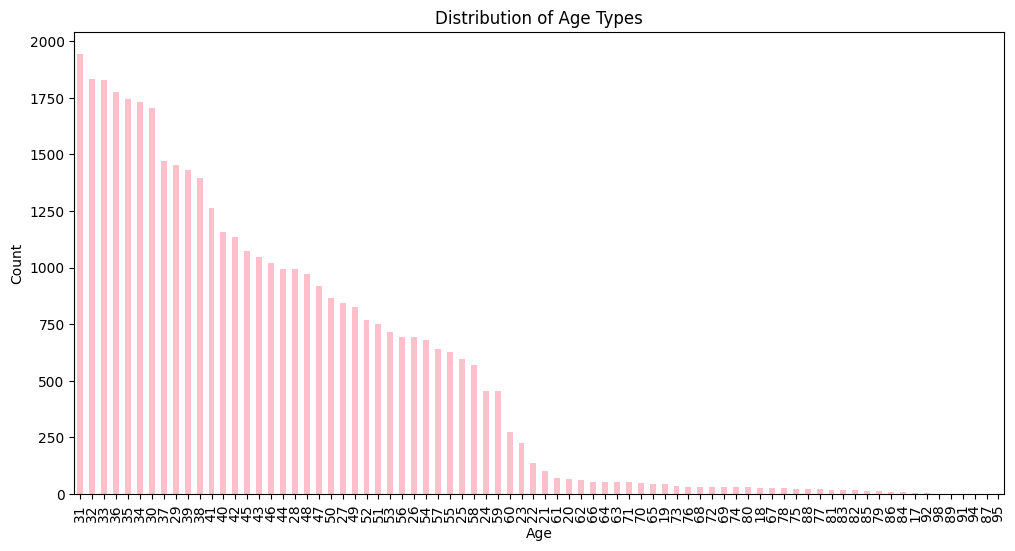

In [101]:
plt.figure(figsize=(12, 6))
df['age'].value_counts().plot(kind='bar', color='pink')
plt.title('Distribution of Age Types')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<p><b>
Distribution of Day of Week types
</b></p>

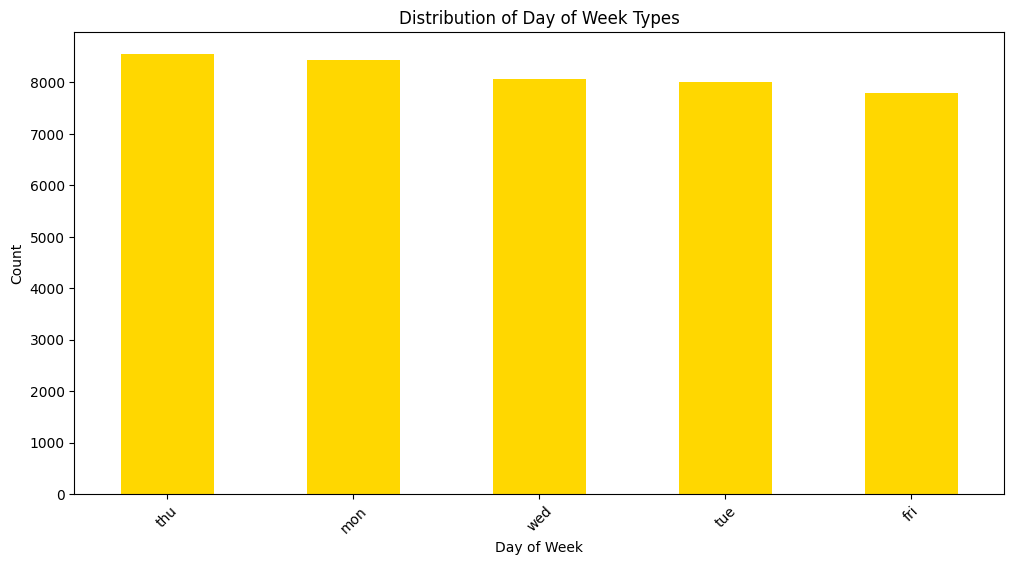

In [102]:
plt.figure(figsize=(12, 6))
df['day_of_week'].value_counts().plot(kind='bar', color='gold')
plt.title('Distribution of Day of Week Types')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<p><b>
Distribution of Day of Contact types
</b></p>

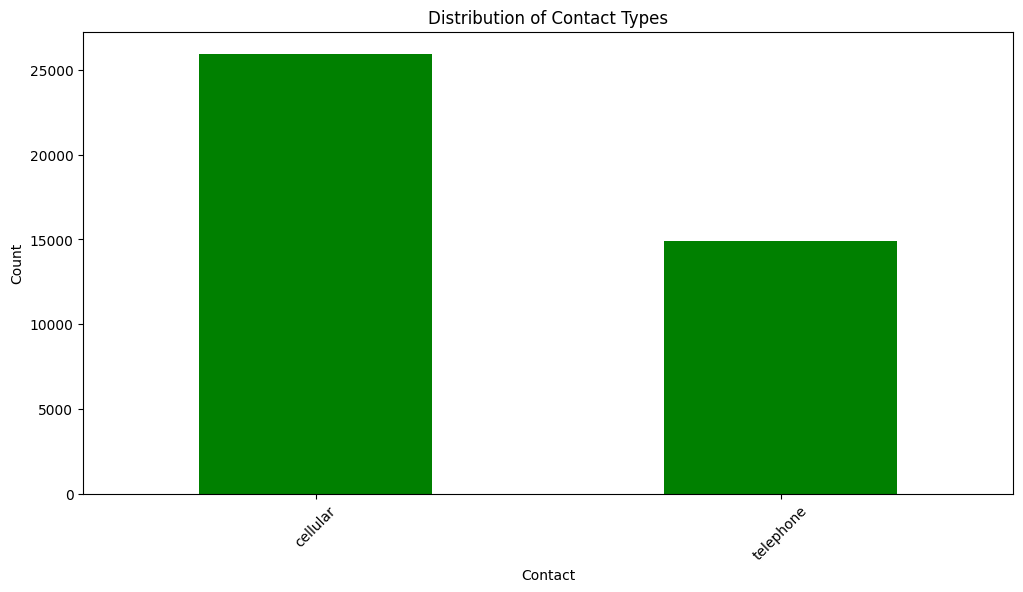

In [103]:
plt.figure(figsize=(12, 6))
df['contact'].value_counts().plot(kind='bar', color='green')
plt.title('Distribution of Contact Types')
plt.xlabel('Contact')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<p><b>
Distribution of Day of Duration types
</b></p>

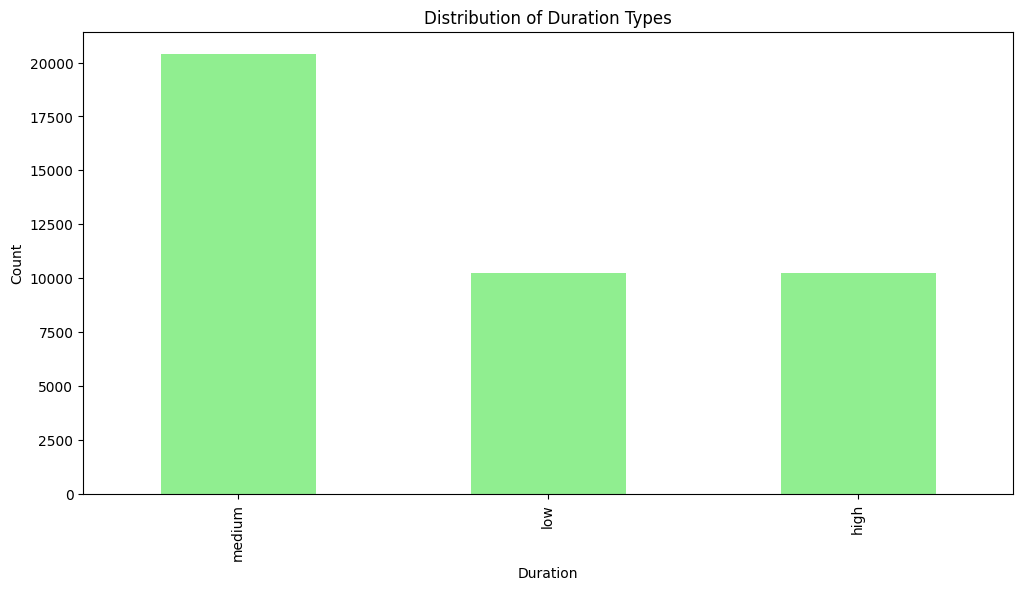

In [104]:
plt.figure(figsize=(12, 6))
df['duration_bin'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Duration Types')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<p><b>
Distribution of Day of poutcome types
</b></p>

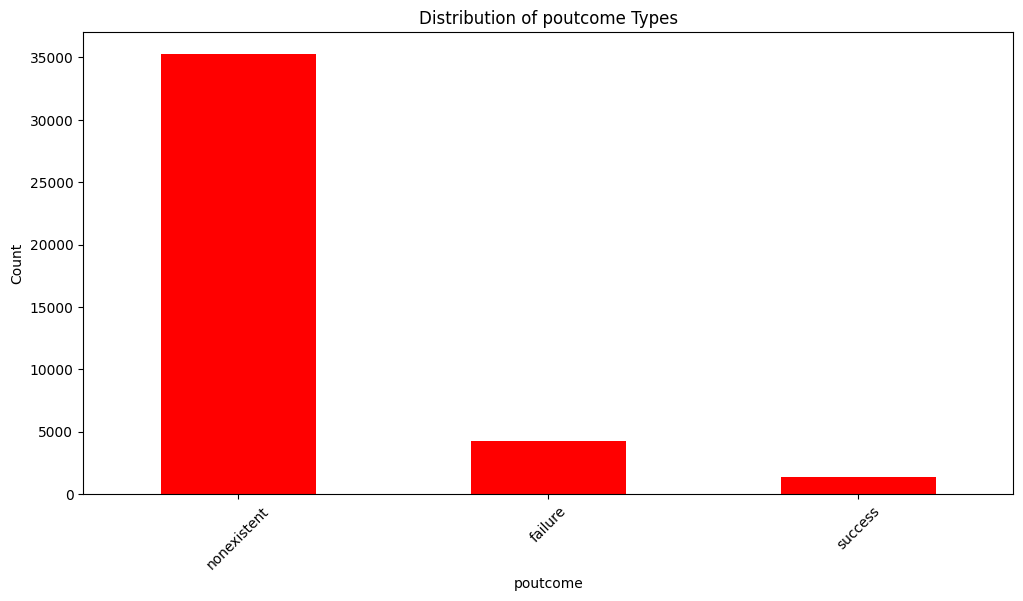

In [105]:
plt.figure(figsize=(12, 6))
df['poutcome'].value_counts().plot(kind='bar', color='red')
plt.title('Distribution of poutcome Types')
plt.xlabel('poutcome')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<p><b>
Distribution of job types
</b></p>

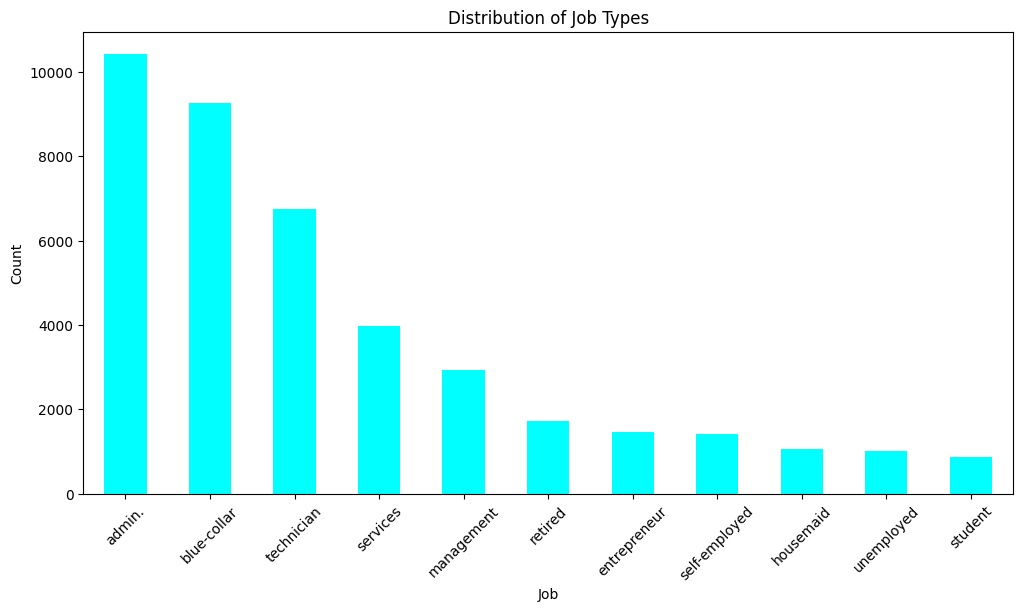

In [106]:
plt.figure(figsize=(12, 6))
df['job'].value_counts().plot(kind='bar', color='cyan')
plt.title('Distribution of Job Types')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<p><b>
Distribution of marital status
</b></p>

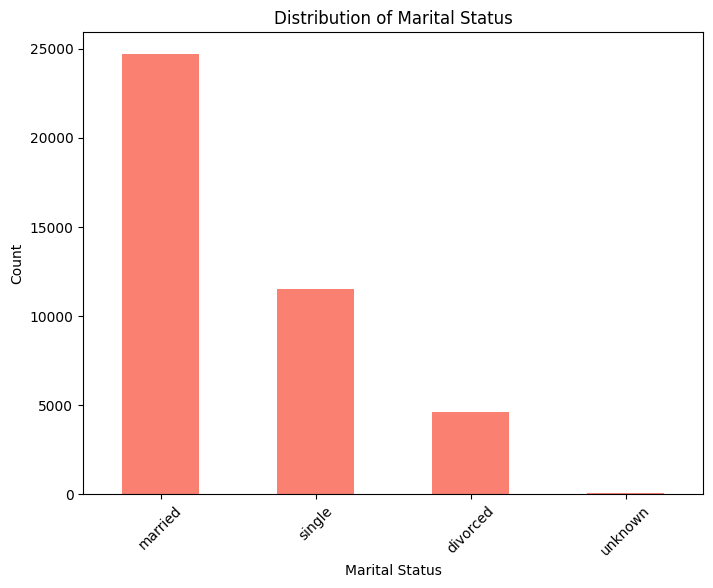

In [107]:
plt.figure(figsize=(8, 6))
df['marital'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<p><b>
Distribution of education levels
</b></p>

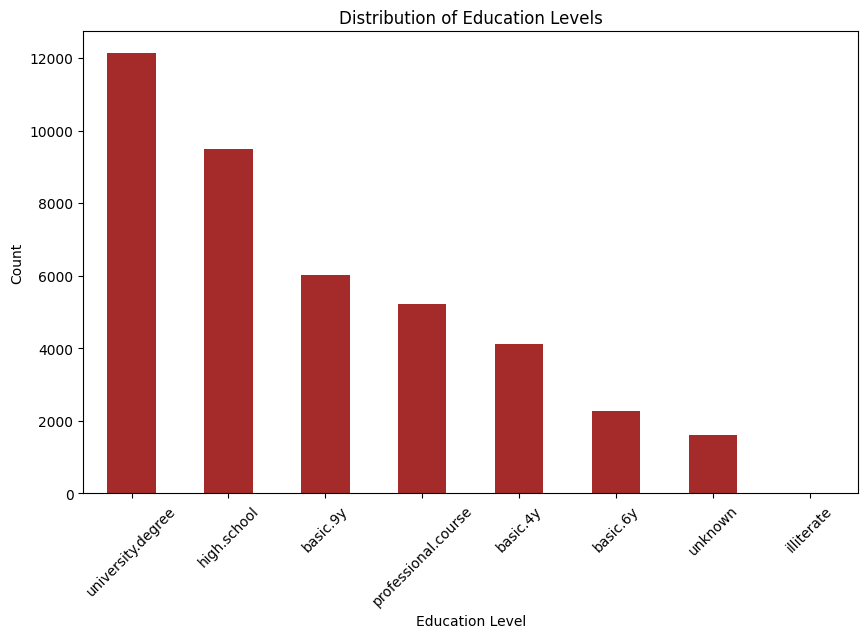

In [108]:
plt.figure(figsize=(10, 6))
df['education'].value_counts().plot(kind='bar', color='brown')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()